# Python @ Two Sigma

## Reproducibility II: Better Notebooks (and Beyond?)
## (a.k.a., Notebook Tricks & Tips)
## (a.k.a., Holiday Grab Bag “Stocking Stuffers”)

### Help People Re-run Your Notebook: Version Info (with `%watermark`)

`watermark`: https://github.com/rasbt/watermark

In [1]:
from sys import version_info
from pandas import __version__ as pd_version
from numpy import __version__ as np_version
from xarray import __version__ as xr_version

version_info, pd_version, np_version, xr_version

(sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0),
 '1.1.3',
 '1.19.2',
 '0.16.2')

In [ ]:
! pip install watermark

In [3]:
%load_ext watermark

In [4]:
%watermark

Last updated: 2020-12-18T09:41:25.514608-05:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 5.4.0-58-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [6]:
%watermark -g -b -v -p pandas,numpy,xarray,networkx -d -u

Last updated: 2020-12-18

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas  : 1.1.3
numpy   : 1.19.2
xarray  : 0.16.2
networkx: 2.5

Git hash: d05c71dada98c2659786d4954ca9e5258aecf8be

Git branch: main



### Help People Understand Your Notebook: Timing (with `%time`)

In [1]:
from time import sleep
from random import random

def slow_process():
    sleep(random() * 5)
    
slow_process()
'Done!'

'Done!'

In [8]:
%%time

slow_process()
'Done!'

CPU times: user 1.04 ms, sys: 2.5 ms, total: 3.54 ms
Wall time: 4.26 s


'Done!'

In [9]:
from IPython.display import display
from random import random
from time import sleep

%time display('Load'); sleep(random())
%time display('Process'); sleep(random())
%time display('Report'); sleep(random())

'Load'

CPU times: user 2.56 ms, sys: 7.32 ms, total: 9.88 ms
Wall time: 282 ms


'Process'

CPU times: user 0 ns, sys: 1.87 ms, total: 1.87 ms
Wall time: 355 ms


'Report'

CPU times: user 6.19 ms, sys: 369 µs, total: 6.56 ms
Wall time: 668 ms


In [10]:
from asyncio import sleep
from random import random

async def slow_process():
    await sleep(random() * 5)
    
await slow_process()
'Done!'

'Done!'

In [11]:
%%time

await slow_process()
'Done!'

SyntaxError: 'await' outside function (<timed exec>, line 1)

In [12]:
%time await slow_process()
'Done!'

SyntaxError: 'await' outside function (<timed eval>, line 1)

### Help Yourself Understand Your Own Notebook: Simple Profiling (with `%prun`)

In [13]:
%%time

from time import sleep
from random import random

def load_data(): pass
def clean_data(): sleep(random())
def report(): pass

def process():
    load_data()
    for _ in range(3):
        clean_data()
    report()
    
process()
'Done!'

CPU times: user 1.81 ms, sys: 345 µs, total: 2.15 ms
Wall time: 1.31 s


'Done!'

In [19]:
%%time

from time import sleep
from random import random

def load_data(): pass
def clean_data(): sleep(random())
def report(): pass

def process():
    load_data()
    for _ in range(3):
        clean_data()
    report()
    
%prun process()
'Done!'

 CPU times: user 3.03 ms, sys: 659 µs, total: 3.68 ms
Wall time: 1.64 s


'Done!'

In [14]:
%%timeit
from time import sleep

sleep(.1)
sleep(.2)

301 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
from time import sleep

%timeit sleep(.1)

100 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
%pip install line_profiler
%load_ext line_profiler

/bin/zsh: /opt/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/zsh)
  Using cached line_profiler-3.1.0-cp38-cp38-manylinux2010_x86_64.whl (65 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from time import sleep

def process():
    sleep(1)
    for _ in range(10):
        sleep(.2)
    sleep(1)
    
%lprun -f process process()

In [10]:
%pip install memory_profiler
%load_ext memory_profiler

/bin/zsh: /opt/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/zsh)
Note: you may need to restart the kernel to use updated packages.
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [16]:
from numpy.random import normal
xs = []
%memit xs.append(normal(size=1024 ** 2))

peak memory: 87.61 MiB, increment: 15.88 MiB


In [17]:
from tracemalloc import start, take_snapshot, stop
from numpy.random import normal
from IPython.display import display
from pandas import DataFrame

start()
before = take_snapshot()
xs = normal(size=100_000)
after = take_snapshot()
stop()

display(before, after)
DataFrame([(*diff.traceback._frames[0], diff.size) for diff in after.compare_to(before, 'lineno')],
         columns='file lineno diff'.split()).set_index(['file', 'lineno'])

diff
file                                               lineno        
<ipython-input-17-8f5cd9008cf1>                    8       800080
/opt/anaconda3/lib/python3.8/codeop.py             136        403
/opt/anaconda3/lib/python3.8/tracemalloc.py        397         88
                                                   534         48
                                                   291         40
/opt/anaconda3/lib/python3.8/site-packages/IPyt... 3263       120
                                                   3257        96
/opt/anaconda3/lib/python3.8/site-packages/IPyt... 150         28

For more sophisticated profiling techniques, look into:
- Scalene: https://github.com/emeryberger/scalene
- Py-Spy: https://github.com/benfred/py-spy

### Help Capture Information All in One Place: Notating Non-Analysis (i.e., Shell Commands) (with `!`)

In [25]:
! ls .

Notes.ipynb  external.py  script.py    test.csv  test2.py  test4.py
__pycache__  helpers.py   slides.clay  test.py	 test3.py


In [26]:
! file Notes.ipynb

Notes.ipynb: UTF-8 Unicode text


In [ ]:
! # rm -rf /

In [27]:
! head -n2 test.csv

date,ticker,price
2020-07-04,AAPL,300


In [ ]:
! pip install numpy

In [28]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
%pycat test.csv

In [30]:
%pycat test.py

In [34]:
%%writefile test.csv
date,ticker,price
2020-07-04,AAPL,300
2020-07-04,GOOG,500

Overwriting test.csv


In [35]:
files = !! find -type f -iname '*.csv'
type(files), files

(IPython.utils.text.SList, ['./test.csv'])

### Help Understand What's Happening During a Slow Cell: Noting Progress (with `tqdm`)

`tqdm`: https://github.com/tqdm/tqdm

In [18]:
%pip install tqdm

/bin/zsh: /opt/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/zsh)
Note: you may need to restart the kernel to use updated packages.


In [20]:
%%time
from time import sleep
from tqdm import tqdm

for _ in tqdm(range(10_000)):
    sleep(.1)

 11%|█         | 1123/10000 [01:55<15:11,  9.73it/s]


KeyboardInterrupt: 

In [42]:
from pandas import DataFrame
from numpy.random import normal, randint

df = DataFrame({'x': normal(size=(size := 100_000)), 'y': randint(-10, 10, size=size)})

df?
df??

[x for x in dir(df) if not x.startswith('_')]

['T',
 'abs',
 'add',
 'add_prefix',
 'add_suffix',
 'agg',
 'aggregate',
 'align',
 'all',
 'any',
 'append',
 'apply',
 'applymap',
 'asfreq',
 'asof',
 'assign',
 'astype',
 'at',
 'at_time',
 'attrs',
 'axes',
 'backfill',
 'between_time',
 'bfill',
 'bool',
 'boxplot',
 'clip',
 'columns',
 'combine',
 'combine_first',
 'compare',
 'convert_dtypes',
 'copy',
 'corr',
 'corrwith',
 'count',
 'cov',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'div',
 'divide',
 'dot',
 'drop',
 'drop_duplicates',
 'droplevel',
 'dropna',
 'dtypes',
 'duplicated',
 'empty',
 'eq',
 'equals',
 'eval',
 'ewm',
 'expanding',
 'explode',
 'ffill',
 'fillna',
 'filter',
 'first',
 'first_valid_index',
 'floordiv',
 'from_dict',
 'from_records',
 'ge',
 'get',
 'groupby',
 'gt',
 'head',
 'hist',
 'iat',
 'idxmax',
 'idxmin',
 'iloc',
 'index',
 'infer_objects',
 'info',
 'insert',
 'interpolate',
 'isin',
 'isna',
 'isnull',
 'items',
 'iteritems',
 'iterrows',
 'itertuples',
 'joi

In [43]:
from pandas import DataFrame
from numpy.random import normal, randint
from tqdm.auto import tqdm; tqdm.pandas()

df = DataFrame({'x': normal(size=(size := 100_000)), 'y': randint(-10, 10, size=size)})

[x for x in dir(df) if not x.startswith('_')]

/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


['T',
 'abs',
 'add',
 'add_prefix',
 'add_suffix',
 'agg',
 'aggregate',
 'align',
 'all',
 'any',
 'append',
 'apply',
 'applymap',
 'asfreq',
 'asof',
 'assign',
 'astype',
 'at',
 'at_time',
 'attrs',
 'axes',
 'backfill',
 'between_time',
 'bfill',
 'bool',
 'boxplot',
 'clip',
 'columns',
 'combine',
 'combine_first',
 'compare',
 'convert_dtypes',
 'copy',
 'corr',
 'corrwith',
 'count',
 'cov',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'div',
 'divide',
 'dot',
 'drop',
 'drop_duplicates',
 'droplevel',
 'dropna',
 'dtypes',
 'duplicated',
 'empty',
 'eq',
 'equals',
 'eval',
 'ewm',
 'expanding',
 'explode',
 'ffill',
 'fillna',
 'filter',
 'first',
 'first_valid_index',
 'floordiv',
 'from_dict',
 'from_records',
 'ge',
 'get',
 'groupby',
 'gt',
 'head',
 'hist',
 'iat',
 'idxmax',
 'idxmin',
 'iloc',
 'index',
 'infer_objects',
 'info',
 'insert',
 'interpolate',
 'isin',
 'isna',
 'isnull',
 'items',
 'iteritems',
 'iterrows',
 'itertuples',
 'joi

In [25]:
from pandas import DataFrame
from numpy.random import normal, randint
from tqdm.auto import tqdm; tqdm.pandas()

df = DataFrame({'x': normal(size=(size := 10_000_000)), 'y': randint(-10, 10, size=size)})

df.groupby('y').progress_apply(sum).head(2)

/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


x          y
y                         
-10  -14.062031 -4997860.0
-9   804.687422 -4502259.0

### Help Yourself Iterate More Effectively: Hot-Reloading Code (with `%autoreload`)

In [50]:
%%writefile test.py
def func():
    return 10_000

Overwriting test.py


In [51]:
from test import func
func()

10

In [52]:
from sys import modules
'test' in modules.keys()

True

In [53]:
%load_ext autoreload
%autoreload 2

In [56]:
%%writefile test2.py
def func():
    return 10_000

Overwriting test2.py


In [57]:
from test2 import func
func()

10000

In [ ]:
func()

In [58]:
%%writefile test3.py
def func():
    return 10

Overwriting test3.py


In [59]:
%autoreload 1
%aimport test3

In [60]:
from test3 import func
func()

10

In [64]:
%%writefile test4.py
class A:
    pass
#
def func():
    return A()

Overwriting test4.py


In [62]:
%autoreload 2
from test4 import A, func
x = func()
isinstance(x, A)

True

In [65]:
y = func()
isinstance(x, A), isinstance(y, A)

(False, False)

### Help Yourself Find Bugs More Easily: Simple Debugging (with `%debug`)

In [66]:
def f(x, y=0):
    return g(x, y)
def g(x, y):
    return h(x, y)
def h(x, y):
    return x / y
    
f(10)

ZeroDivisionError: division by zero

In [67]:
%debug

> <ipython-input-66-ce25f83a68f2>(6)h()
      4     return h(x, y)
      5 def h(x, y):
----> 6     return x / y
      7 
      8 f(10)

ipdb> p x
10
ipdb> p y
0
ipdb> up
> <ipython-input-66-ce25f83a68f2>(4)g()
      2     return g(x, y)
      3 def g(x, y):
----> 4     return h(x, y)
      5 def h(x, y):
      6     return x / y

ipdb> p x
10
ipdb> p y
0
ipdb> p locals()
{'x': 10, 'y': 0}
ipdb> up
> <ipython-input-66-ce25f83a68f2>(2)f()
      1 def f(x, y=0):
----> 2     return g(x, y)
      3 def g(x, y):
      4     return h(x, y)
      5 def h(x, y):

ipdb> exit


In [68]:
1 + 1

2

### Help Yourself Keep Your Notebook Alive Longer: Being Aware of `In` and `Out`

In [69]:
for _ in range(10):
    pass

In [72]:
In

['',
 'from sys import version_info\nfrom pandas import __version__ as pd_version\nfrom numpy import __version__ as np_version\nfrom xarray import __version__ as xr_version\n\nversion_info, pd_version, np_version, xr_version',
 "get_ipython().run_line_magic('watermark', '')",
 "get_ipython().run_line_magic('load_ext', 'watermark')",
 "get_ipython().run_line_magic('watermark', '')",
 "get_ipython().run_line_magic('watermark', '-g -b -v -p pandas,numpy,xarray -d -u')",
 "get_ipython().run_line_magic('watermark', '-g -b -v -p pandas,numpy,xarray,networkx -d -u')",
 "from time import sleep\nfrom random import random\n\ndef slow_process():\n    sleep(random() * 5)\n    \nslow_process()\n'Done!'",
 'get_ipython().run_cell_magic(\'time\', \'\', "\\nslow_process()\\n\'Done!\'\\n")',
 'from IPython.display import display\nfrom random import random\nfrom time import sleep\n\nget_ipython().run_line_magic(\'time\', "display(\'Load\'); sleep(random())")\nget_ipython().run_line_magic(\'time\', "disp

In [74]:
Out

{1: (sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0),
  '1.1.3',
  '1.19.2',
  '0.16.2'),
 7: 'Done!',
 8: 'Done!',
 10: 'Done!',
 13: 'Done!',
 19: 'Done!',
 24:                                                              diff
 file                                               lineno        
 <ipython-input-24-8f5cd9008cf1>                    8       800080
 /opt/anaconda3/lib/python3.8/tracemalloc.py        397        512
 /opt/anaconda3/lib/python3.8/asyncio/events.py     81         480
 /opt/anaconda3/lib/python3.8/tracemalloc.py        534        472
 <ipython-input-24-8f5cd9008cf1>                    9          424
                                                    7            0
 /opt/anaconda3/lib/python3.8/codeop.py             141        467
 /opt/anaconda3/lib/python3.8/site-packages/IPyt... 763        119
 /opt/anaconda3/lib/python3.8/queue.py              107         72
 /opt/anaconda3/lib/python3.8/site-packages/zmq/... 448         64
 /opt/

In [73]:
type(Out)

dict

In [76]:
from numpy.random import normal

xs = normal(size=10_000)
xs

array([ 0.62141797,  0.45053122, -0.27491144, ...,  1.07587997,
        1.5333217 ,  0.65848359])

In [77]:
Out[76].nbytes

80000

In [78]:
del xs

In [ ]:
Out[...].nbytes

In [79]:
from numpy.random import normal

xs = normal(size=10_000)
xs

array([-1.36187111,  0.98891337, -0.10907004, ..., -0.5089659 ,
       -1.00811785,  0.44608355])

In [80]:
%xdel xs

In [ ]:
Out[...]

### Help Yourself Better Organize Your Notebooks

In [ ]:
from time import sleep
sleep(1)

In [85]:
def f(x):
    return x + 1

In [84]:
f(1) / f(2)

0.6666666666666666

In [ ]:
%%writefile helpers.py
def f(x):
    return x + 1

In [ ]:
from pandas import DataFrame
from collections import namedtuple
from numpy.random import normal

df = DataFrame({'x': normal(size=100)})

class Analysis(namedtuple('AnalysisBase', 'filtered sampled raw')):
    @classmethod
    def from_df(cls, df):
        filtered = df[df['x'] > .5]
        sampled  = df.sample(5)
        return cls(filtered, sampled, df)
    
result = Analysis.from_df(df)
result.filtered.head(2)

### Final Tips & Tricks

#### Displaying Results

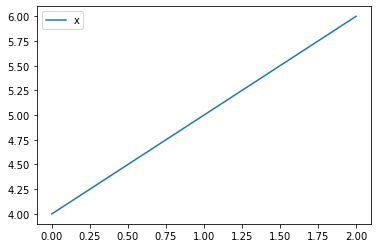

In [32]:
from IPython.display import display
from IPython.core.display import Markdown
from pandas import DataFrame

df1 = DataFrame({'x': [1, 2, 3]})
df2 = DataFrame({'x': [4, 5, 6]})
df2.plot();

In [43]:
from IPython.display import display, Markdown, Latex
from pandas import DataFrame

df1 = DataFrame({'x': [1, 2, 3]})
df2 = DataFrame({'x': [4, 5, 6]})

display(
    Markdown('### df1 from example 1'),
    Latex(r'$\frac{1}{2}$'),
    df1,
    Markdown('### df2 from example 2'),
    df2,
)

### df1 from example 1

<IPython.core.display.Latex object>

x
0  1
1  2
2  3

### df2 from example 2

x
0  4
1  5
2  6

In [49]:
from IPython.core.interactiveshell import InteractiveShell; InteractiveShell.ast_node_interactivity = 'all'
from pandas import DataFrame

df1 = DataFrame({'x': [1, 2, 3]})
df2 = DataFrame({'x': [4, 5, 6]})

df1
_ = df1.sort_index()
df2

x
0  1
1  2
2  3

x
0  4
1  5
2  6

In [94]:
from IPython.display import Latex, Markdown

Latex(r'$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$')
xs = [1, 2, 3]
xs.append(4)
Markdown('''
## Heading
### Subheading
''')

<IPython.core.display.Latex object>


## Heading
### Subheading


#### Displaying Environment

In [97]:
%env LANG

'C.UTF-8'

#### Running External Scripts

In [98]:
%%writefile script.py
from datetime import datetime
from pathlib import Path
from pandas import DataFrame

print(f'Running {Path(__file__).name} @ {datetime.now()} with {__name__ = }')
df = DataFrame({'x': [1, 2, 3]})

Overwriting script.py


In [100]:
%run script.py

Running script.py @ 2020-12-18 10:25:09.771182 with __name__ = '__main__'


In [101]:
%run -t -m script

Running script.py @ 2020-12-18 10:25:10.861748 with __name__ = '__main__'

IPython CPU timings (estimated):
  User   :       0.00 s.
  System :       0.00 s.
Wall time:       0.01 s.


In [102]:
from runpy import run_path
run_path('script.py')

Running script.py @ 2020-12-18 10:25:28.693732 with __name__ = '<run_path>'


{'__name__': '<run_path>',
 '__doc__': None,
 '__package__': '',
 '__loader__': None,
 '__spec__': None,
 '__file__': 'script.py',
 '__cached__': None,
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__>,
  'abs': <function abs(x, /)>,
  'all': <function all(iterable, /)>,
  'any': <function any(iterable, /)>,
  'ascii': <function ascii(obj, /)>,
  'bin': <function bin(number, /)>,
  'breakpoint': <function breakpoint>,
  'callable': <function callable(obj, /)>,
  'chr': <function chr(i, /)>,
  'compile': <function compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1, *, _feature_vers

In [103]:
from runpy import run_path
run_path('script.py')['df']

Running script.py @ 2020-12-18 10:25:32.240904 with __name__ = '<run_path>'


x
0  1
1  2
2  3

In [104]:
from runpy import run_path
run_path('script.py', run_name='__main__')['df']

Running script.py @ 2020-12-18 10:25:38.001065 with __name__ = '__main__'


x
0  1
1  2
2  3

In [105]:
from runpy import run_path
run_path('script.py', 
         init_globals={},
         run_name='__main__')['df']

Running script.py @ 2020-12-18 10:25:39.786558 with __name__ = '__main__'


x
0  1
1  2
2  3

#### Loading External Code

In [108]:
%%writefile external.py
from pandas import DataFrame
df = DataFrame({'x': [1, 2, 3]})
df = DataFrame({'x': [1, 2, 3]})
df = DataFrame({'x': [1, 2, 3]})
df = DataFrame({'x': [1, 2, 3]})

Overwriting external.py


In [ ]:
# %load external.py
from pandas import DataFrame
df = DataFrame({'x': [1, 2, 3]})
df = DataFrame({'x': [1, 2, 3]})
df = DataFrame({'x': [1, 2, 3]})
df = DataFrame({'x': [1, 2, 3]})


#### Simple Prototyping with `cython`

In [50]:
def dot(xs, ys):
    total = 0
    for x, y in zip(xs, ys):
        total += x * y
    return total

In [51]:
from random import randint
xs = [randint(-1000, 1000) for _ in range(1_000_000)]
ys = [randint(-1000, 1000) for _ in range(1_000_000)]

%time dot(xs, ys)
dot

CPU times: user 83.1 ms, sys: 0 ns, total: 83.1 ms
Wall time: 83.1 ms


91118223

<function __main__.dot(xs, ys)>

In [52]:
%load_ext cython

In [53]:
%%cython
def dot(xs, ys):
    total = 0
    for x, y in zip(xs, ys):
        total += x * y
    return total

In [54]:
from random import randint
xs = [randint(-1000, 1000) for _ in range(1_000_000)]
ys = [randint(-1000, 1000) for _ in range(1_000_000)]

%time dot(xs, ys)
dot

CPU times: user 60.6 ms, sys: 0 ns, total: 60.6 ms
Wall time: 60.6 ms


350316770

<function _cython_magic_439ea2b23b67fab5c03fa150b487017c.dot>

In [120]:
from IPython.display import HTML
from pandas import DataFrame
df = DataFrame({'x': [1, 2, 3]})
-